In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(256 * 2 * 2, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(self.bn1(torch.relu(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(self.bn2(torch.relu(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(self.bn3(torch.relu(self.conv3(x))))
        x = self.dropout(x)
        x = self.pool(self.bn4(torch.relu(self.conv4(x))))
        x = self.dropout(x)
        x = x.view(-1, 256 * 2 * 2)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
model = CNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.2294
Epoch [2/10], Loss: 0.8867
Epoch [3/10], Loss: 0.7526
Epoch [4/10], Loss: 0.6714
Epoch [5/10], Loss: 0.6158
Epoch [6/10], Loss: 0.5768
Epoch [7/10], Loss: 0.5315
Epoch [8/10], Loss: 0.5042
Epoch [9/10], Loss: 0.4708
Epoch [10/10], Loss: 0.4495


In [5]:
# Testing
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 79.90%


In [14]:
# Visualization of predictions
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

import torch
import matplotlib.pyplot as plt
import numpy as np

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Print the shape of images and labels
print(f"Shape of images: {images.shape}")  # Expected shape: (batch_size, 3, 32, 32) or similar
print(f"Shape of labels: {labels.shape}")  # Expected shape: (batch_size,)

# Show the actual labels
print(f"Actual labels: {labels}")

# Move images to the same device as the model
images = images.to(device)

# Predict on test images
outputs = model(images)

# Print the raw model output (logits)
print(f"Raw model outputs (logits): {outputs}")

# Convert raw outputs to probabilities using softmax and get the predicted class
_, predicted = torch.max(outputs, 1)

Shape of images: torch.Size([64, 3, 32, 32])
Shape of labels: torch.Size([64])
Actual labels: tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])
Raw model outputs (logits): tensor([[ -4.3204,  -4.9693,  -2.7758,   6.2715,  -2.5287,   2.1188,   1.4298,
          -3.3165,  -3.7202,  -4.8529],
        [  3.1101,   6.7208,  -6.9168,  -2.3659,  -8.7572,  -6.6442,  -5.0455,
          -7.8479,   8.4804,  -0.4426],
        [  2.7975,   1.6014,  -3.1072,  -3.6299,  -5.4096,  -4.1930,  -6.3468,
          -2.4906,   5.2224,   0.4512],
        [  5.5603,  -3.6957,   0.7746,  -0.6335,  -1.0760,  -4.2340,  -2.3674,
          -4.1355,   1.0919,  -2.6328],
        [ -6.9245,  -4.3190,   0.0939,   2.9077,   3.8306,  -2.2463,   6.7335,
          -5.4709,  -2.5547,  -3.6933],
        [ -4.5824,  -9.4943,  -0.8321,   1.7422,   1.4447,   1.205

Predicted labels: tensor([7, 3, 8, 0, 8, 4, 7, 0, 3, 3, 3, 3, 4, 5, 1, 7], device='cuda:0')


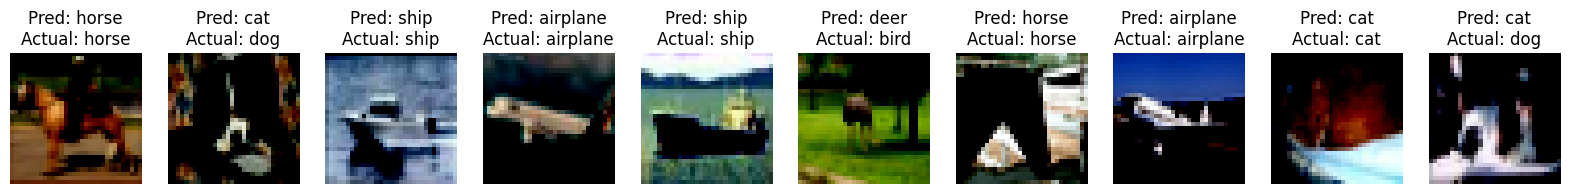

In [13]:
# Print the predicted labels
print(f"Predicted labels: {predicted}")

# Visualize the images with predictions and actual labels
fig, axes = plt.subplots(1, 10, figsize=(20, 20))  # Assuming a batch size of 10 for visualization
for i in range(10):
    image = images[i].cpu().numpy().transpose((1, 2, 0))  # Convert from Tensor to NumPy and transpose for correct orientation
    image = np.clip(image, 0, 1)  # Ensure image values are in range [0, 1]

    axes[i].imshow(image)
    axes[i].set_title(f"Pred: {classes[predicted[i]]}\nActual: {classes[labels[i]]}")
    axes[i].axis('off')

plt.show()

# Now let's check accuracy across the entire test dataset
correct = 0
total = 0

# Turn off gradient computation for testing/inference to speed up the process and save memory
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [11]:
# Print batch accuracy
print(f"Batch Accuracy: {(predicted == labels).sum().item() / labels.size(0) * 100:.2f}%")

Batch Accuracy: 68.75%


In [12]:

# Print overall accuracy
print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

Accuracy of the network on the test images: 79.90%
